In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt

In [7]:
data = pd.read_csv("/Users/hardik/Documents/Semester5/3. Data Mining/marketing_campaign.csv",sep="\t")

In [8]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [30]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['Education'] = en.fit_transform(data['Education'])
data['Marital_Status'] = en.fit_transform(data['Marital_Status'])

In [41]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [42]:
X = data.drop(['ID','Dt_Customer','Year_Birth','Income'],axis=1)

In [43]:
X

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,2,4,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,2,4,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,2,5,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,2,5,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,4,3,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,0,1,46,709,43,182,42,118,...,5,0,0,0,0,0,0,3,11,0
2236,4,5,2,1,56,406,0,30,0,0,...,7,0,0,0,1,0,0,3,11,0
2237,2,2,0,0,91,908,48,217,32,12,...,6,0,1,0,0,0,0,3,11,0
2238,3,5,0,1,8,428,30,214,80,30,...,3,0,0,0,0,0,0,3,11,0


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new= pca.fit_transform(X)

In [61]:
pca.explained_variance_ratio_

array([0.78670162, 0.17131753])

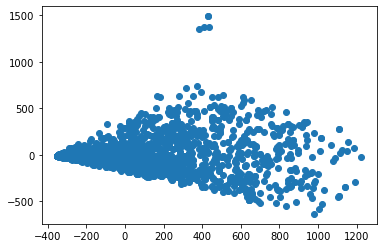

In [62]:
pyplt.scatter(x_new[:,0],x_new[:,1])
pyplt.show()

In [63]:
from sklearn.cluster import DBSCAN

In [64]:
model=DBSCAN(eps=5, min_samples=4)
Y=model.fit_predict(x_new)
Y

array([-1,  0, -1, ..., -1, -1,  1])

In [65]:
np.unique(Y)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [66]:
from sklearn.metrics import silhouette_score
silhouette_score(x_new,Y)

-0.21195111574952977

In [67]:
model=DBSCAN(eps=10, min_samples=4)
Y1=model.fit_predict(x_new)
silhouette_score(x_new,Y1)

-0.11061029682864909

In [68]:
from sklearn.preprocessing import StandardScaler

In [75]:
def dbscan(x_new, eps, min_samples):
    ss = StandardScaler()
    x_new = ss.fit_transform(x_new)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(x_new)
    y_pred = db.fit_predict(x_new)
    print(np.unique(y_pred))
    #pyplt.scatter(x_new[:,0], x_new[:,1],c=y_pred, cmap='Paired')
    #pyplt.title("DBSCAN")
    return y_pred
    
y = dbscan(X, 10, 4)


[0 1]


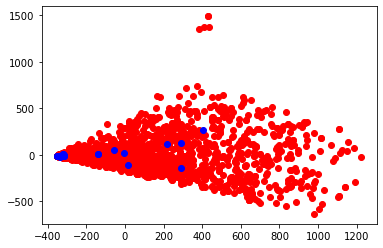

In [79]:
pyplt.scatter(x_new[y==0,0], x_new[y==0,1], c='red')
pyplt.scatter(x_new[y==1,0], x_new[y==1,1], c='blue')

In [ ]:
# K-mean Clustering

Text(0, 0.5, 'WCC')

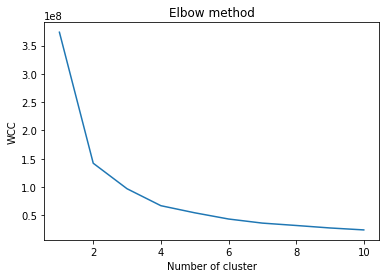

In [80]:
from sklearn.cluster import KMeans
n = []
for i in range(1,11):
    model = KMeans(n_clusters=i , random_state=0)
    model.fit(x_new)
    n.append(model.inertia_)
pyplt.plot(range(1,11),n)
pyplt.title("Elbow method")
pyplt.xlabel("Number of cluster")
pyplt.ylabel("WCC")

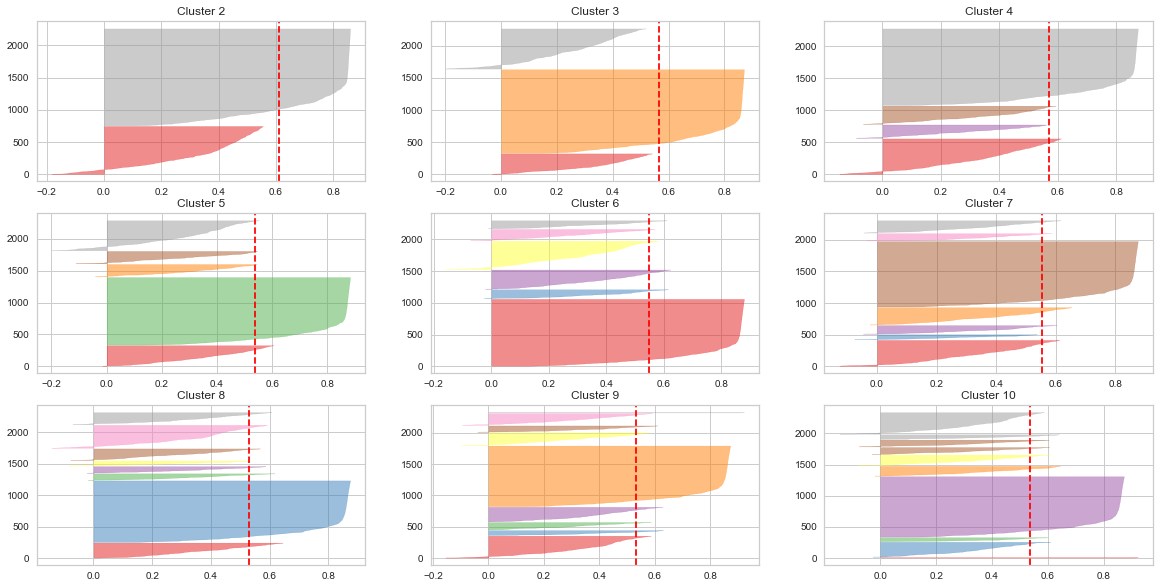

In [81]:
from yellowbrick.cluster import SilhouetteVisualizer
m = 0
fig,ax = pyplt.subplots(3,3,figsize = (20,10))
ax = ax.ravel()
for i in range(2,11):
    model = KMeans(n_clusters=i,random_state=0)
    vis = SilhouetteVisualizer(model,ax[m])
    ax[m].set_title(f"Cluster {i}")
    vis.fit(x_new)
    m+=1

In [85]:
model = KMeans(n_clusters=2,random_state=0)
y = model.fit_predict(x_new)

from sklearn.metrics import silhouette_score
silhouette_score(x_new,y)

0.6110438304047017